# Personal Loan Acceptance


*Notebook File - [Loan_Acceptance.ipynb](https://anaconda.org/arun2728/loanacceptance)*

*Github Repo - [Bank Loan Acceptance](https://github.com/arun2728/data-science-portfolio/tree/main/Loan%20Acceptance)*

*Dataset Repo - [Universal bank data for classification](https://www.kaggle.com/sriharipramod/bank-loan-classification)*



### Context: 

This case is about a bank (Universal bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns to better target marketing to increase the success ratio with a minimal budget.

The department wants to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

### Problem Statement: 

The classification goal is to predict the likelihood of a liability customer buying personal loans.


### Attribute Information

The file UniversalBank.csv contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

#### Input variables:

1) **ID** (Customer ID)


2) **Age:** Customer's age in completed years


3) **Experience:** years of professional experience


4) **Income:** Annual income of the customer ($000)


5) **ZIP Code:** Home Address ZIP code.


6) **CCAvg:** Avg. spending on credit cards per month ($000)


7) **Education:** Education Level
*     1 - Undergrad
*     2 - Graduate
*     3 - Advanced/Professional


8) **Mortgage:** Value of house mortgage if any. ($000)


9) **Family:** Family size of the customer


10) **Securities Account:** Does the customer have a securities account with the bank?


11) **CD Account:** Does the customer have a certificate of deposit (CD) account with the bank?


12) **Online:** Does the customer use internet banking facilities?


13) **Credit card:** Does the customer use a credit card issued by


#### Output variable (desired target):

14) **Personal Loan:** Did this customer accept the personal loan offered in the last campaign?

<a id ='toc'></a>
# Table of Contents

1. **[Environment Setup](#environment_setup)**
    - 1.1 - **[Install Package](#install_packages)**
    - 1.2 - **[Load Dependencies](#import_packages)**
2. **[Load dataset](#load_data)**
3. **[Data Types and Dimensions](#Data_Types)**
4. **[Data Preprocessing](#data_preprocessing)**
    - 4.1 - **[Data Cleaning](#data_cleaning)**
        - 4.1.1 - [Remove irrelevant features](#irrelevant)
        - 4.1.2 - [Convert Data Types](#convert_datatypes)
        - 4.1.3 - [Missing Data Treatment](#missing_values)
    - 4.2 - **[Exploratory Data Analysis](#exploratory_analysis)**
        - 4.2.1 - [Numeric features](#numerical_features)
        - 4.2.2 - [Categorical features](#categorical_features)
    - 4.3 - **[Data Transformation](#data_transformation)**
        - 4.3.1 - [Label Encoding Categorical Feature](#label_encoding)
        - 4.3.2 - [Normalization](#normalization)
        - 4.3.3 - [Split the dataset](#split_the_dataset)
5. **[Model Development](#model_development)**
    - 5.1 - [Logistic_Regression](#Logistic_Regression)
    - 5.2 - [Naive Bayes](#Naive_Bayes)
    - 5.3 - [Support Vector Machine](#svm)
    - 5.4 - [Random Forest](#random_forest)
6. **[Model Comparision](#model_cmp)**  
7. **[Conclusion](#conclusion)**

<a id ='environment_setup'></a>
## 1. Environment Setup

[goto toc](#toc)

<a id ='install_packages'></a>
### 1.1. Install Packages

Install required packages

[goto toc](#toc)

In [1]:
# Install pandas
! pip install pandas

# Install matplotlib
! pip install matplotlib

# Install seaborn
! pip install seaborn 

# Install sklearn
! pip install sklearn

# Install tqdm to visualize iterations
! pip install tqdm

<a id ='import_packages'></a>
### 1.2. Load Dependencies

Import required packages

[goto toc](#toc)

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from tqdm import tqdm
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

import seaborn as sns

# Set default setting of seaborn
sns.set()

In [3]:
# Import label encoder 
from sklearn.preprocessing import LabelEncoder

# Import the required function for normalization
from sklearn.preprocessing import StandardScaler

# Import train and test split function
from sklearn.model_selection import train_test_split

In [4]:
# Import Classifiers to be used

# Import Logistic regressor 
from sklearn.linear_model import LogisticRegression

# Import Naive bayes classifier
from sklearn.naive_bayes import GaussianNB

# Import Support Vector Machine
from sklearn.svm import SVC

# Import Grid Search Cross Validation for tunning
from sklearn.model_selection import GridSearchCV

# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
# Import packages to calculate performance of the models
from sklearn import metrics

# Function to compute confusion metric
from sklearn.metrics import confusion_matrix

# Function to generate classification report
from sklearn.metrics import classification_report

# Function to calculate PR AUC Score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

In [6]:
# To save the model
import joblib

In [7]:
# Create output folder to save model and plots
import os

# Get current working directory
current_dir = os.getcwd()

# Folder to save model
model_dir = current_dir + "/model"
os.makedirs(model_dir, exist_ok=True)

# Folder to save plots
plots_dir = current_dir + "/plots"
os.makedirs(plots_dir, exist_ok=True)

<a id ='load_data'></a>
## 2. Load dataset

Read data from personal_loan.csv file using pandas method read_csv().

[goto toc](#toc)

In [8]:
# read the data
raw_data = pd.read_csv(current_dir + '/data/UniversalBank.csv')

# print the first five rows of the data
raw_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<a id ='Data_Types'></a>
## 3. Data Types and Dimensions

[goto toc](#toc)

In [9]:
print("Universal Bank Data Set has \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m variables each.".format(*raw_data.shape))

Universal Bank Data Set has 5000 data points with 14 variables each.


In [10]:
# check the data types of the features
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Note:**

Features like **Family**, **Education**, **Personal Loan**, **Securities Account**, **CD Account**, **Online** and **CreditCard** are actually categorical in nature but are represemted as numeric so we need to convert them for better analysis.

<a id='data_preprocessing'></a>
## 4. Data Preprocessing


*Data preprocessing is a data mining technique which is used to transform the raw data in a useful and efficient format.*

[...goto toc](#toc)

<a id='data_cleaning'></a>
## 4.1. Data Cleaning

*Data cleaning* refers to preparing data for analysis by removing or modifying data that is incomplete, irrelevant, duplicated, or improperly formatted.

[...goto toc](#toc)

In [11]:
# Rename features
raw_data.columns = ["ID", "Age", "Experience", "Income", "ZIPCode", "Family", "CCAvg", "Education",
                    "Mortgage", "PersonalLoan", "SecuritiesAccount", "CDAccount", "Online", "CreditCard"]

<a id='irrelevant'></a>
## 4.1.1. Remove irrelevant features

The first and foremost thing you should do is remove useless pieces of data from your system. Any useless or irrelevant data is the one you don’t need. It might not fit the context of your issue.

[...goto toc](#toc)

In [12]:
# Create copy of the dataframe
data_1 = raw_data.copy(deep = True)

In [13]:
# Dropping Unneccesary columns
data_1.drop(["ID","ZIPCode"], axis=1, inplace=True)

# print first five rows
data_1.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


<a id='convert_datatypes'></a>
## 4.1.2. Convert Data Types

Data types should be uniform across your dataset. A string can’t be numeric nor can a numeric be a boolean. 

[...goto toc](#toc)

In [14]:
# Create copy of the dataframe
data_2 = data_1.copy(deep = True)

In [15]:
# Create list of features to be converted into category
cat_cols = ["Family","Education","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [16]:
# Convert numeric to categorical
for feature in cat_cols:
    data_2[feature] = pd.Categorical(data_2[feature])

In [17]:
# Check for datatypes
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                5000 non-null   int64   
 1   Experience         5000 non-null   int64   
 2   Income             5000 non-null   int64   
 3   Family             5000 non-null   category
 4   CCAvg              5000 non-null   float64 
 5   Education          5000 non-null   category
 6   Mortgage           5000 non-null   int64   
 7   PersonalLoan       5000 non-null   category
 8   SecuritiesAccount  5000 non-null   category
 9   CDAccount          5000 non-null   category
 10  Online             5000 non-null   category
 11  CreditCard         5000 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 230.6 KB


<a id='missing_values'></a>
## 4.1.3. Missing Data Treatment

If the missing values are not handled properly we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained will differ from the ones where the missing values are present.

[...goto toc](#toc)

In [18]:
# get the count of missing values
missing_values = data_2.isnull().sum()

# print the count of missing values
print(missing_values)

Age                  0
Experience           0
Income               0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64


**Note: There are no missing values in the dataset so we can proceed further**

In [19]:
# Get categorical features
categorical_features = data_2.select_dtypes('category').columns.values.tolist()

# Get nuemric features
numerical_features = [col for col in data_2.columns.values if col not in categorical_features]

In [20]:
print("Universal Bank Data Set has \033[4m\033[1m{}\033[0m\033[0m data points with \033[4m\033[1m{}\033[0m\033[0m variables each.".format(*data_2.shape))
print(f"Numeric features: \033[4m\033[1m{len(numerical_features)}\033[0m\033[0m \nCategorical features: \033[4m\033[1m{len(categorical_features)}\033[0m\033[0m")

Universal Bank Data Set has 5000 data points with 12 variables each.
Numeric features: 5 
Categorical features: 7


<hr style="border:1px solid gray"> </hr>
<h3><center>Summary</center></h3>
<hr style="border:1px solid gray"> </hr>

| Number of Instances | Number of Attributes | Numeric Features | Categorical Features | Missing Values |
| :-: | :-: | :-: | :-: | :-: |
| 5000  | 12 | 5 | 7  | Null |

<a id='exploratory_analysis'></a>
## 4.2. Exploratory Analysis

The preliminary analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set with the help of statistics and visualization tools is called Exploratory Data Analysis (EDA). 

Exploratory data analysis is cross-classified in two different ways where each method is either graphical or non-graphical. And then, each method is either univariate, bivariate or multivariate.

[...goto toc](#toc)

In [21]:
# Create copy of the dataframe
data = data_2.copy()

<a id='numerical_features'></a>
### 4.2.1. Numerical Features

*Analysis of only numeric features*

[...goto toc](#toc)

In [22]:
# Get only numeric features for analysis
numeric_data = data[numerical_features]
numeric_data.head()

,Age,Experience,Income,CCAvg,Mortgage
0,25,1,49,1.6,0
1,45,19,34,1.5,0
2,39,15,11,1.0,0
3,35,9,100,2.7,0
4,35,8,45,1.0,0


In [23]:
# Summary of the data
numeric_data.describe()

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937938,56.498800
std,11.463166,11.467954,46.033729,1.747659,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
max,67.000000,43.000000,224.000000,10.000000,635.000000


**Note: Experience is negeative for some entries which is invalid and cannot be accepted.**

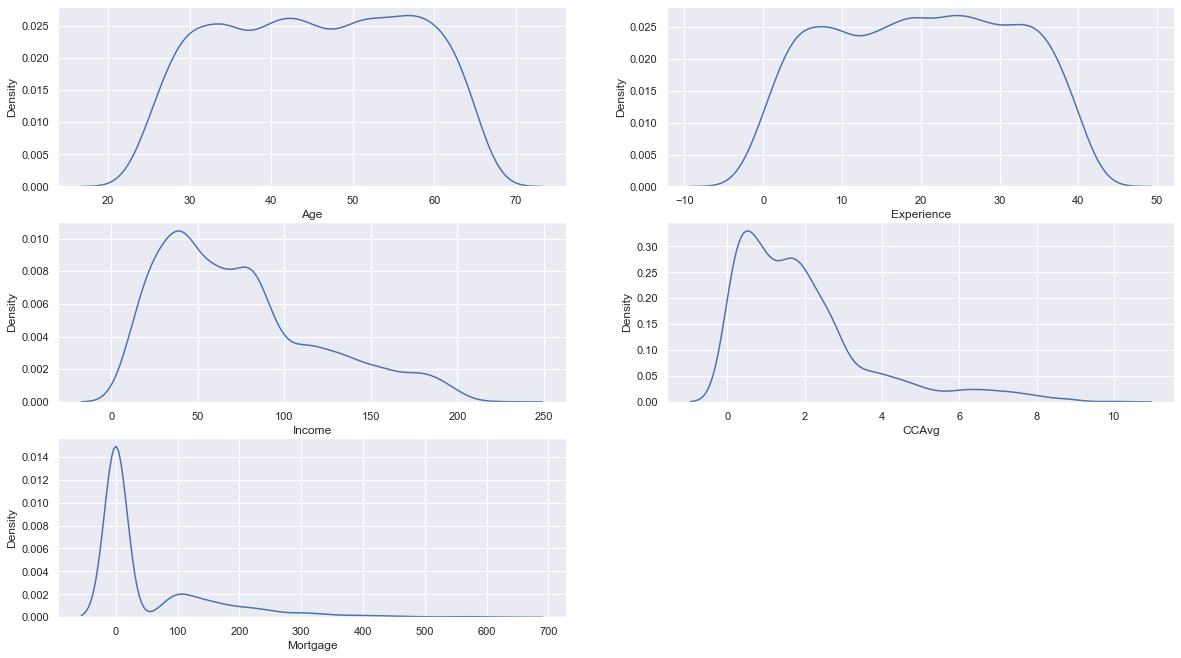

In [24]:
# PLot KDE for all features

# Set size of the figure
plt.figure(figsize=(20,35))

# Iterate on list of features
for i, col in enumerate(numerical_features):
    if numeric_data[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        kde = sns.kdeplot(numeric_data[col], ax=ax)
        plt.xlabel(col)
        
# Save the plot
plt.savefig("plots/Numeric_Features_1.png")

# Show plot        
plt.show()

<Figure size 1296x648 with 0 Axes>

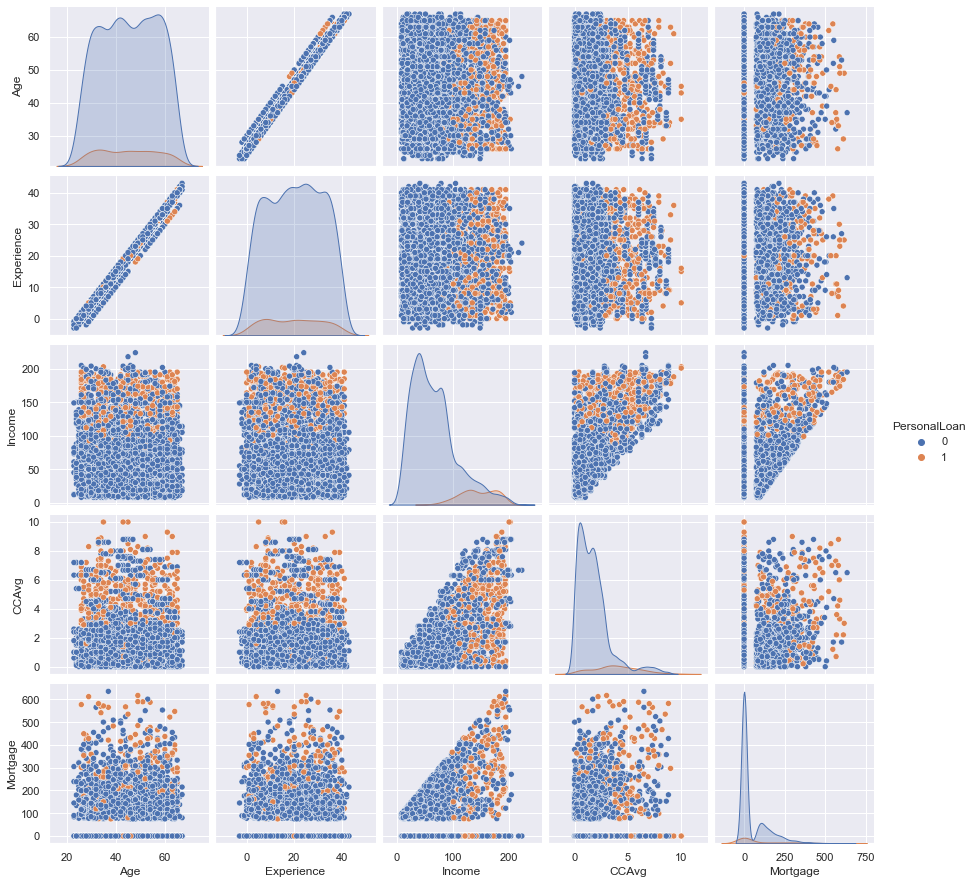

In [25]:
# Create a temp dataframe
temp = data[numerical_features]

# Add target feature
temp.insert(len(numerical_features), "PersonalLoan", data['PersonalLoan'].values.tolist(), True)

# Visualizing numerical variables
plt.figure(figsize = (18, 9))
sns.pairplot(data = temp, hue='PersonalLoan')

# Save the plot
plt.savefig("plots/Numeric_Features_2.png")

# Show plot        
plt.show()

**Important Inferences:** 

- **Age** feature is normally distributed with majority of customers falling between **30 years and 60 years** of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

- **Experience** is normally distributed with more customer having experience starting from **8 years**. Here the mean is equal to median. There are negative values in the Experience. 

    - This could be a data input error as in general it is not possible to measure negative years of experience. We will replace with the negeative records with median of entries having save age as age and experience are related to each other.

- Additionally, scatter plot of **Age** and **experience** indicated that they are positively correlated. As experience increase age also increases. 

- **Income** is positively skewed. Majority of the customers have income between **45K** and **55K**. We can confirm this by saying the mean is greater than the median

- **CCAvg** is also a positively skewed variable and average spending is between **0K to 10K** and majority spends less than **2.5K**

- Customers having a personal loan have a higher credit card average. Average credit card spending with a median of **3800** dollar indicates a **higher probability** of personal loan. Lower credit card spending with a median of **1400** dollars is less likely to take a loan. 

- **70%** of the individuals have a **mortgage** of less than **40K**. However the max value is **635K**.



In [26]:
# Get count records having negeative experience
print(f"Total number of negeative records for Experience feature are \033[4m\033[1m{data[data['Experience'] < 0]['Experience'].count()}\033[0m\033[0m")

Total number of negeative records for Experience feature are 52


In [27]:
# Handling negeative entries of experience

# Get all entries with positive experience
temp_exp = data.loc[data['Experience'] > 0]

# Get all entries with negeative experience
temp_neg_exp = data.Experience < 0

# Get the customer's ID having negative experience
id_neg_list = raw_data.loc[temp_neg_exp]['ID'].tolist() 

#### Steps to handle negeative experience

- For all the record with the ID in id_neg_list, get the value of Age and Education
- Filter the records matching the above criteria from the data frame which has records with positive experience, then calculate the median of the matched records
- Apply the median back to the location which had negative experience

In [28]:
# Handle negeative experience
for cust_id in id_neg_list:
    
    # Records with the ID in id_neg_list, get the value of Age
    age = data.loc[np.where(raw_data['ID'] == cust_id)]["Age"].tolist()[0]
    
    # Record with the ID in id_neg_list, get the value of Education
    education = data.loc[np.where(raw_data['ID'] == cust_id)]["Education"].tolist()[0]
    
    # Dataframe to store matched records
    temp_filtered = temp_exp[(temp_exp.Age == age) & (temp_exp.Education == education)]
    
    # Calculate median of experience feature
    median_exp = temp_filtered['Experience'].median()
    
    # Apply the median back to the location which had negative experience
    data.loc[data.loc[np.where(raw_data['ID'] == cust_id)].index, 'Experience'] = median_exp

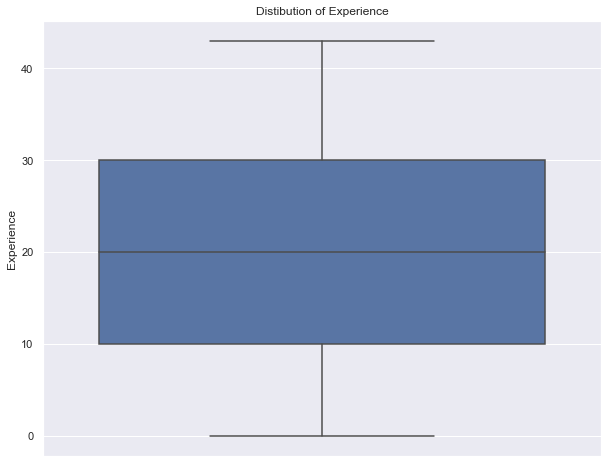

In [29]:
# Check the distribution of experience

# Set size of figure
plt.figure(figsize = (10,8)) 

# Plot boxplot of experience
sns.boxplot(data = data, y = "Experience") 

# Add title to the plot
plt.title("Distibution of Experience") 

# Show the plot
plt.show() 

### Correlation

In [30]:
# check correlation
corr = data.corr(method = 'spearman')
corr

,Age,Experience,Income,CCAvg,Mortgage
Age,1.000000,0.994341,-0.056772,-0.049617,-0.010655
Experience,0.994341,1.000000,-0.050887,-0.049518,-0.011637
Income,-0.056772,-0.050887,1.000000,0.580210,0.061087
CCAvg,-0.049617,-0.049518,0.580210,1.000000,0.023807
Mortgage,-0.010655,-0.011637,0.061087,0.023807,1.000000


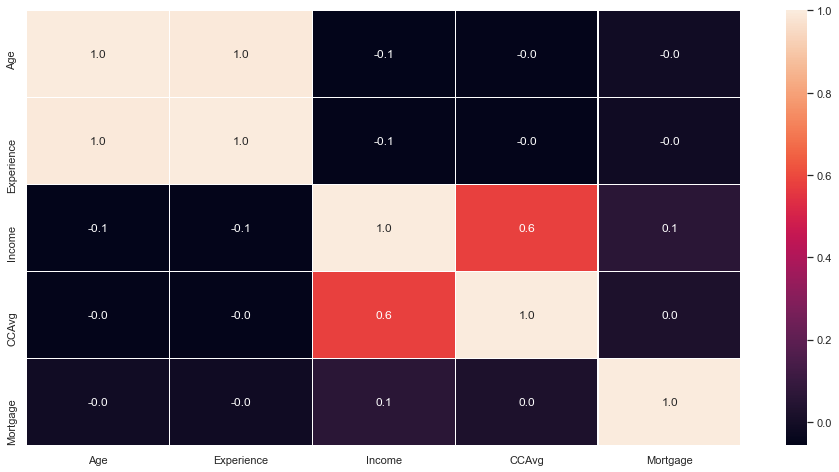

In [31]:
# correlation map
f,ax = plt.subplots(figsize=(16, 8))
sns_plot = sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f', ax=ax)

# Save the plot
f.savefig("plots/correlation.png")

# Show the plot
plt.show()

**Important Inferences:** 

- Income and CCAvg are moderately correlated.
- Age and Experience are highly correlated

In [32]:
# We will drop 'Experience' feature
numeric_data = numeric_data.drop('Experience', axis = 1)

In [33]:
numeric_data.shape

(5000, 4)

<a id='categorical_features'></a>
### 4.4.2. Categorical Features

In Analysis of categorical features we will explore them using some visualizations. Additionally, we will be performing **Chi-Squared Test** to identify relationship of a categorical feature with other features.

[...goto toc](#toc)

In [34]:
# Get only categorical features for analysis
categorical_data = data[categorical_features]
categorical_data.head()

,Family,Education,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,4,1,0,1,0,0,0
1,3,1,0,1,0,0,0
2,1,1,0,0,0,0,0
3,1,2,0,0,0,0,0
4,4,2,0,0,0,0,1


In [35]:
def plot_categorical_features(data, categorical_features, target):
    count = 0
    for feature in categorical_features:
        
        if feature == target:
            continue
            
        print("-"*150)
        print(f"Feature : \033[4m\033[1m{feature}\033[0m\033[0m")
        print("-"*150)
        
        labels = data[feature].unique().tolist()
        
        # Create subplots figure
        fig, axes = plt.subplots(1, 2, figsize=(18, 6))
        
        if count % 2 == 0:
            # Plot countplot of feature with respect to target
            sns.countplot(x = feature, data = data, hue = target, ax = axes[0], palette='rainbow')

            # Plot pie chart to show distribution of feature
            axes[1].pie(data[feature].value_counts().values, labels = labels, autopct='%1.1f%%',startangle=90)
            axes[1].set_xlabel(feature, size=22)

        else:
            # Plot pie chart to show distribution of feature
            axes[0].pie(data[feature].value_counts().values, labels = labels, autopct='%1.1f%%',startangle=90)
            axes[0].set_xlabel(feature, size=22)
            
            # Plot countplot of feature with respect to target
            sns.countplot(x = feature, data = data, hue = target, ax = axes[1], palette='rainbow')   
        
        # Increase the counter
        count += 1
        
        # Save features
        fig.savefig(f"plots/{feature}_feature.png")
        
        # Show all plots
        plt.show()
             

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature : Family
------------------------------------------------------------------------------------------------------------------------------------------------------


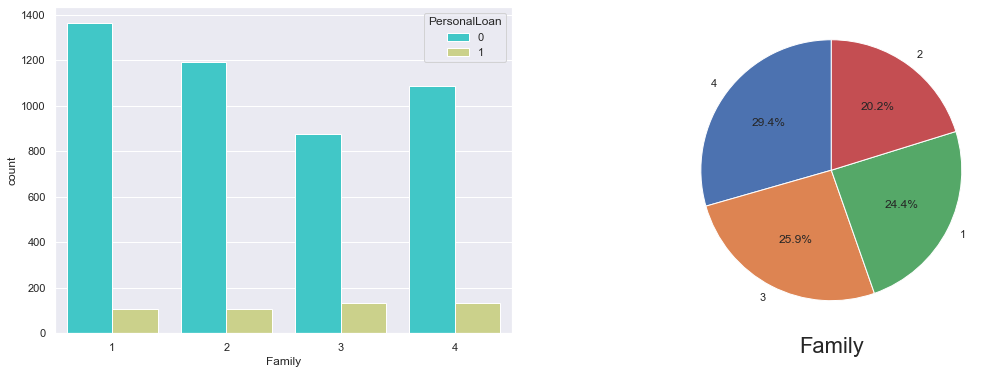

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature : Education
------------------------------------------------------------------------------------------------------------------------------------------------------


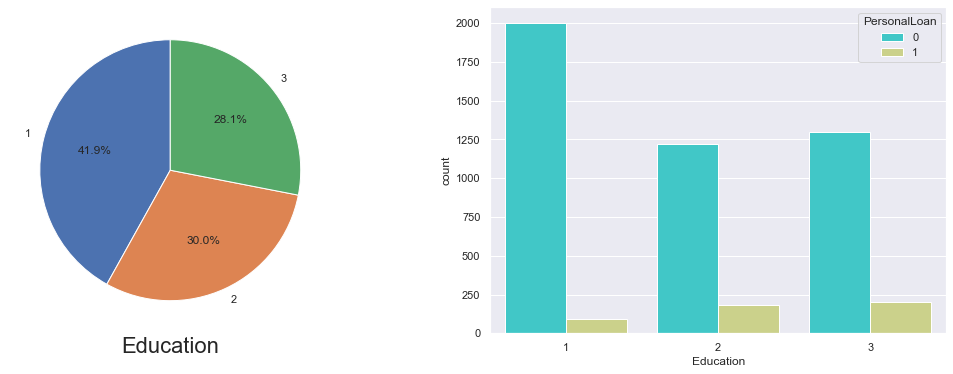

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature : SecuritiesAccount
------------------------------------------------------------------------------------------------------------------------------------------------------


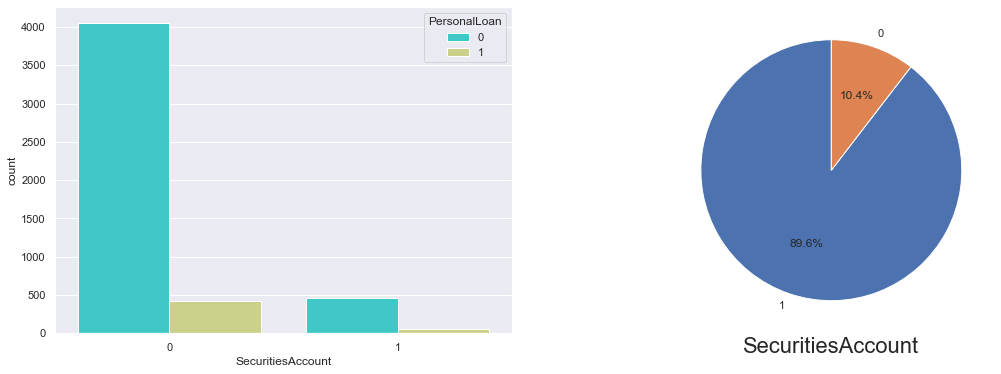

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature : CDAccount
------------------------------------------------------------------------------------------------------------------------------------------------------


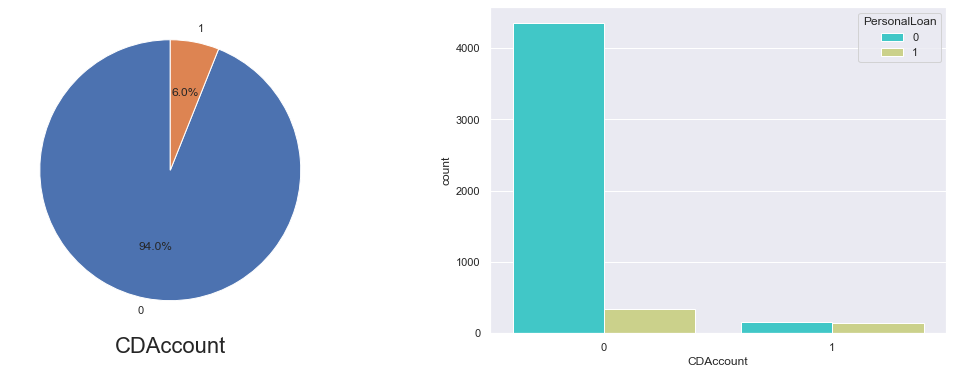

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature : Online
------------------------------------------------------------------------------------------------------------------------------------------------------


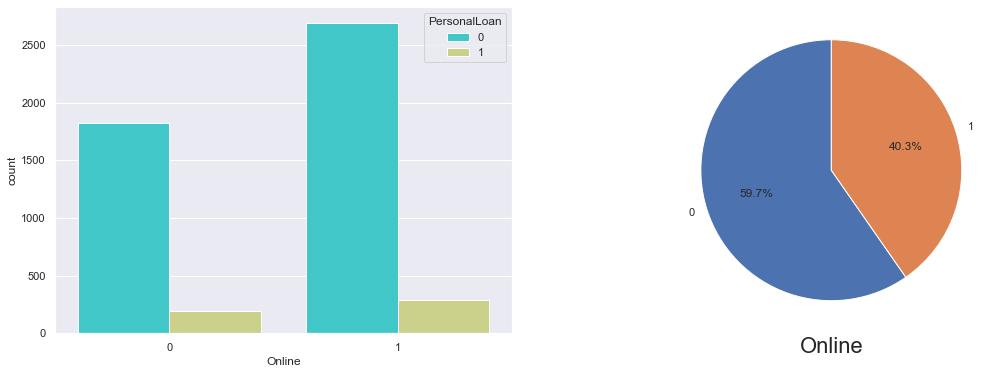

------------------------------------------------------------------------------------------------------------------------------------------------------
Feature : CreditCard
------------------------------------------------------------------------------------------------------------------------------------------------------


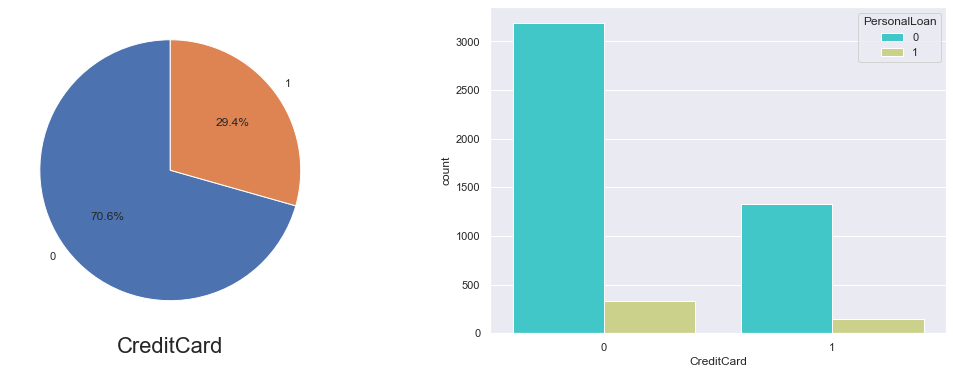

In [36]:
plot_categorical_features(categorical_data, categorical_features, target = "PersonalLoan")

**Observation :** 

- Majority of customers who does not have loan have securities account
- Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.
- Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

### Analyzing target feature

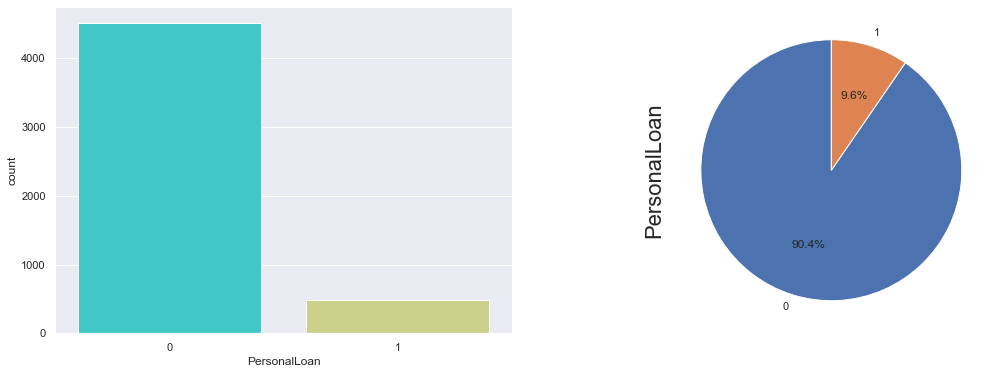

In [37]:
# Create subplots figure
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

target = "PersonalLoan"

# Plot countplot of feature with respect to target
sns.countplot(x = target, data = data, ax = axes[0], palette='rainbow')

# Plot pie chart to show distribution of feature

labels = data[target].unique()

axes[1].pie(categorical_data[target].value_counts().values, labels = labels, autopct='%1.1f%%',startangle=90)
axes[1].set_ylabel(target, size=22)

# Save plot
fig.savefig('plots/target_feature.png')

# Show all plots
plt.show()

### Influence of income and education on personal loan

<AxesSubplot:xlabel='Education', ylabel='Income'>

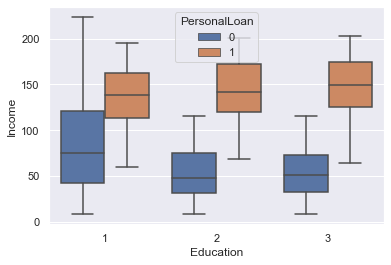

In [38]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data = data)

**Observation :** It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels

### Influence of Mortage and education on personal loan

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

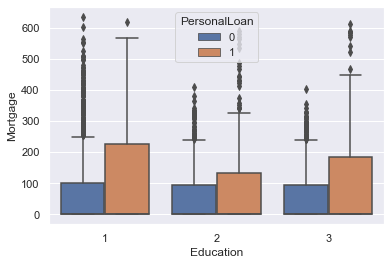

In [39]:
sns.boxplot(x = "Education", y = 'Mortgage', hue = "PersonalLoan", data = data)

**Inference :** From the above chart it seems that customers having personal loan have high mortgage

### Chi-squared Test

The Chi-Squared test is a statistical hypothesis test that assumes (the null hypothesis) that two categorical features are dependent. It checkes if two categorical variables are independent or not.

We can interpret the test statistic in the context of the chi-squared distribution with the requisite number of degress of freedom as follows:

    - If Statistic >= Critical Value: significant result, reject null hypothesis (H0), dependent.
    - If Statistic < Critical Value: not significant result, fail to reject null hypothesis (H0), independent.

The degrees of freedom for the chi-squared distribution is calculated based on the size of the contingency table as
<br>



-<center><b>Degree's of Freedom = (rows - 1) * (cols - 1)</b></center>-



In terms of a p-value and a chosen significance level (alpha), the test can be interpreted as follows:

    - If p-value <= alpha: significant result, reject null hypothesis (H0), dependent.
    - If p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent.


In [40]:
from scipy.stats import chi2_contingency

# Function to perform Chi-squared Test
def perform_chisquared_test(data, features, alpha = 0.05):
    chi_test = pd.DataFrame()
    dependent_feature, independent_features = [], []
    for feature in features:
        for f in features:
            if feature == f:
                chi_test.loc[feature, f] = 1
                continue
            stat, p, dof, expected = chi2_contingency(pd.crosstab(categorical_data[feature], categorical_data[f]))
            chi_test.loc[feature, f] = p
            
            if p <= alpha:
                if (f, feature) not in dependent_feature:
                    dependent_feature.append((feature, f))
            else:
                if (f, feature) not in independent_features:
                    independent_features.append((feature, f))
        
    return chi_test, dependent_feature, independent_features

In [41]:
# perform test

alpha = 0.05
chi_test, dependent_feature, independent_features = perform_chisquared_test(categorical_data, categorical_features, alpha=alpha)
chi_test

,Family,Education,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
Family,1.000000e+00,7.287679e-34,1.614412e-06,5.445135e-01,1.816763e-02,3.973556e-01,2.793896e-01
Education,7.287679e-34,1.000000e+00,6.991474e-25,6.799513e-01,5.799550e-01,1.697842e-01,5.376533e-01
PersonalLoan,1.614412e-06,6.991474e-25,1.000000e+00,1.405150e-01,7.398298e-110,6.928600e-01,8.843861e-01
SecuritiesAccount,5.445135e-01,6.799513e-01,1.405150e-01,1.000000e+00,2.328904e-110,3.976891e-01,3.115835e-01
CDAccount,1.816763e-02,5.799550e-01,7.398298e-110,2.328904e-110,1.000000e+00,3.520986e-35,7.325271e-86
Online,3.973556e-01,1.697842e-01,6.928600e-01,3.976891e-01,3.520986e-35,1.000000e+00,7.902178e-01
CreditCard,2.793896e-01,5.376533e-01,8.843861e-01,3.115835e-01,7.325271e-86,7.902178e-01,1.000000e+00


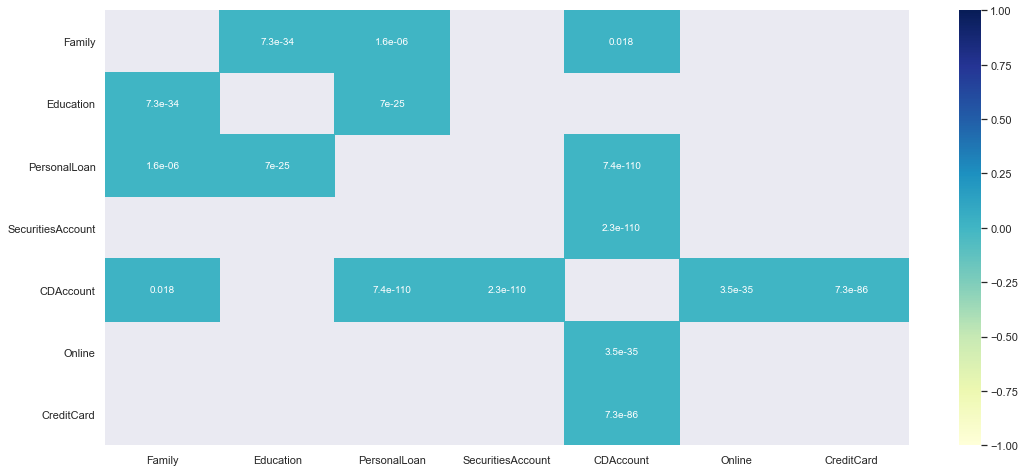

In [42]:
# Plot heatmap
plt.figure(figsize = (18,8))

sns.heatmap(chi_test[(chi_test <= alpha)], cmap='YlGnBu', vmax=1.0, vmin=-1.0,
            annot=True, annot_kws={"size": 10})

# Save the plot
plt.savefig("plots/Chi-squared Test.png")

# Show the plot

In [43]:
print("Dependent Features", dependent_feature)

Dependent Features [('Family', 'Education'), ('Family', 'PersonalLoan'), ('Family', 'CDAccount'), ('Education', 'PersonalLoan'), ('PersonalLoan', 'CDAccount'), ('SecuritiesAccount', 'CDAccount'), ('CDAccount', 'Online'), ('CDAccount', 'CreditCard')]


### Let's explore each dependency

<AxesSubplot:xlabel='Family', ylabel='count'>

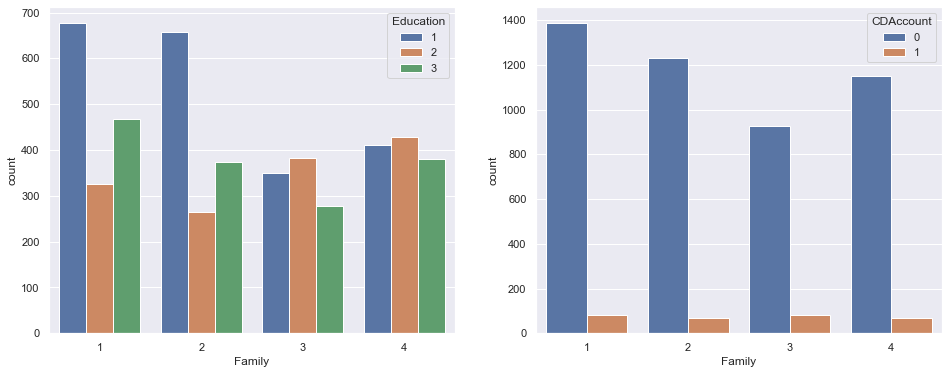

In [44]:
fig, ax = plt.subplots(1, 2, figsize = (16,6))
sns.countplot(x='Family',data=data,hue='Education', ax = ax[0])
sns.countplot(x='Family',data=data,hue='CDAccount', ax = ax[1])

**Observations**

- Generally, as family size increase we can see that the education qualification decrease. Family with more number of members don't opte for higher studies.
- Additionaly, Larger familes prefer to have a certificate of deposit (CD) account with the bank

<AxesSubplot:xlabel='CreditCard', ylabel='count'>

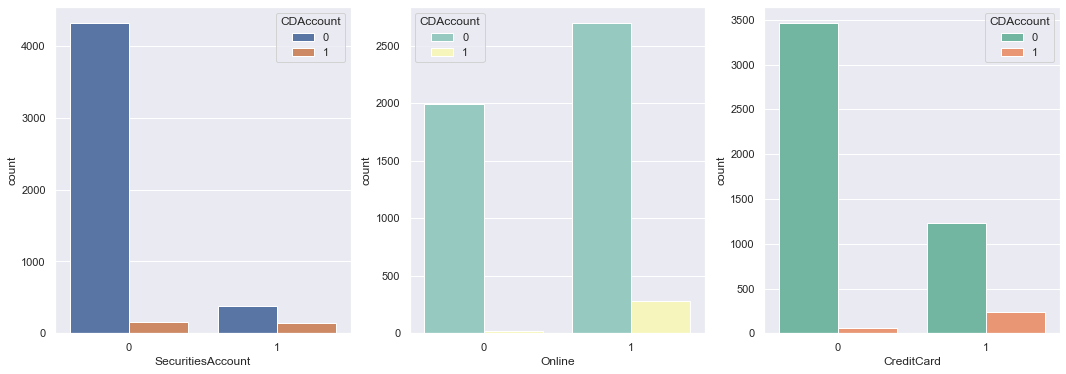

In [45]:
fig, ax = plt.subplots(1, 3, figsize = (18,6))
sns.countplot(x='SecuritiesAccount', data=data, hue ='CDAccount', ax = ax[0])
sns.countplot(x='Online', data=data, hue ='CDAccount', ax = ax[1], palette='Set3')
sns.countplot(x='CreditCard', data=data, hue ='CDAccount', ax = ax[2], palette='Set2')

**Observation**

-  Generally, customers use a internet banking facilities have a certificate of deposit (CD) account with the bank
- Customers using a credit card don't opt for a certificate of deposit account with the bank
- It is clear that majority of customers not having a Securities Account don't have CD Account

<a id='data_transformation'></a>
## 4.3. Data Transformation

[...goto toc](#toc)



In [47]:
final_data = pd.concat([numeric_data, categorical_data], axis = 1)
final_data.head()

,Age,Income,CCAvg,Mortgage,Family,Education,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,49,1.6,0,4,1,0,1,0,0,0
1,45,34,1.5,0,3,1,0,1,0,0,0
2,39,11,1.0,0,1,1,0,0,0,0,0
3,35,100,2.7,0,1,2,0,0,0,0,0
4,35,45,1.0,0,4,2,0,0,0,0,1


<a id='label_encoding'></a>
### 4.3.1 Label Encoding Categorical Features

*Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering.*

[...goto toc](#toc)


In [48]:
# Perform label encoding
for feature in categorical_features:
        # Initialize the label encoder 
        label_encoder = LabelEncoder()

        # Encode labels in column  
        final_data[feature] = label_encoder.fit_transform(final_data[feature])

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                5000 non-null   int64  
 1   Income             5000 non-null   int64  
 2   CCAvg              5000 non-null   float64
 3   Mortgage           5000 non-null   int64  
 4   Family             5000 non-null   int64  
 5   Education          5000 non-null   int64  
 6   PersonalLoan       5000 non-null   int64  
 7   SecuritiesAccount  5000 non-null   int64  
 8   CDAccount          5000 non-null   int64  
 9   Online             5000 non-null   int64  
 10  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [49]:
# Get independent features
x = final_data.drop('PersonalLoan', axis = 1)

# Get target feature
y = final_data['PersonalLoan']

<a id='normalization'></a>
### 4.3.2 Normalization

*Normalization is used to scale the data of an attribute so that it falls in a smaller range, such as -1.0 to 1.0 or 0.0 to 1.0. It is generally useful for classification algorithms.*

We will use *Standard Scaler* to perform normalization.

[...goto toc](#toc)


In [50]:
# Initilize scaler
scaler = StandardScaler()

# fit the scaler
scaler.fit(x)

StandardScaler()

In [51]:
# Transform the dataset
X = scaler.transform(x)

<a id='split_the_dataset'></a>
### 4.4.2. Split dataset

We will be splitting the dataset into train and test set with **80-20** split

[...goto toc](#toc)


In [52]:
# let us now split the dataset into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# print the shape of 'x_train'
print("X_train : ",X_train.shape)

# print the shape of 'x_test'
print("X_test : ",X_test.shape)

# print the shape of 'y_train'
print("y_train : ",y_train.shape)

# print the shape of 'y_test'
print("y_test : ",y_test.shape)

X_train :  (4000, 10)
X_test :  (1000, 10)
y_train :  (4000,)
y_test :  (1000,)


<a id='model_development'></a>
## 5. Model Development

We will be training different classification model and choose the one with best performance

[...goto toc](#toc)


### Evaluation Metric

*The problem we are working on is Imbalanced Classification Problem because our target feature is imbalanced. We shouldn’t use accuracy as a metric for imbalanced problems.*

Since we care equally about positive and negative classes we will be using 

- Confusion Matrix 
- Precision Recall AUC Score
- Precision
- Recall
- F1 Score - F1 score is calculated from Precision and Recall



In [53]:
# Tabulate the result

# create a list of column names
cols = ['Model', "PR-AUC Score", 'Precision Score', 'Recall Score', 'f1-score']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

<a id="Logistic_Regression"> </a>
### 5.1 Logistic Regression

*Training a logistic regression classifier*

[...goto toc](#toc)

In [54]:
# Initialize the regressor
logistic = LogisticRegression()

In [55]:
# Fit the model on training set
logistic.fit(X_train,y_train)

LogisticRegression()

In [56]:
# predict the values
y_pred = logistic.predict(X_test)

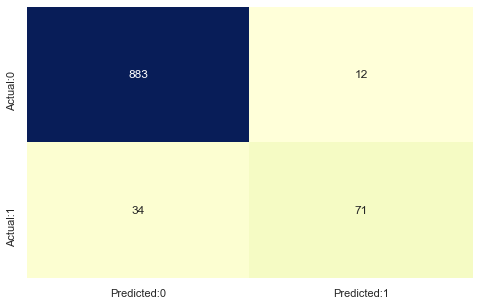

In [57]:
# Compute the accuracy

# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

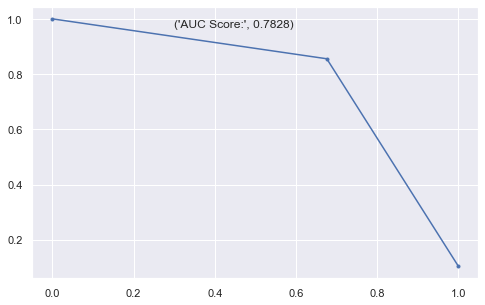

In [58]:
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calcaulte AUC Score
auc_precision_recall = auc(recall, precision)

# set the figure size
plt.figure(figsize = (8,5))

# plot the ROC curve
plt.plot(recall, precision, marker='.')

# add the AUC score
plt.text(x = 0.3, y = 0.97, s =('AUC Score:', round(auc_precision_recall,4)))

plt.show()

In [59]:
# compiling the required information
logistic_regression_estimator = pd.Series({'Model': "Logistic Regression",
                     'PR-AUC Score' : auc_precision_recall,
                 'Precision Score': metrics.precision_score(y_test, y_pred),
                 'Recall Score': metrics.recall_score(y_test, y_pred),
                  'f1-score':metrics.f1_score(y_test, y_pred)})



# appending our result table
result_tabulation = result_tabulation.append(logistic_regression_estimator , ignore_index = True)

# view the result table
result_tabulation

,Model,PR-AUC Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.782806,0.855422,0.67619,0.755319


<a id="Naive_Bayes"> </a>
## 5.2 Naive Bayes

[...goto toc](#toc)

In [60]:
# build the model
GNB = GaussianNB()

# fit the model
GNB.fit(X_train, y_train)

GaussianNB()

In [61]:
# predict the values
y_pred_GNB  = GNB.predict(X_test)

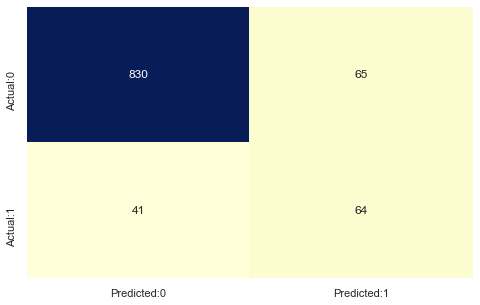

In [62]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_GNB)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

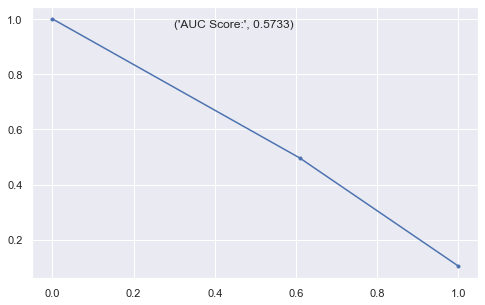

In [63]:
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_GNB)

# Calcaulte AUC Score
auc_precision_recall = auc(recall, precision)

# set the figure size
plt.figure(figsize = (8,5))

# plot the ROC curve
plt.plot(recall, precision, marker='.')

# add the AUC score
plt.text(x = 0.3, y = 0.97, s =('AUC Score:', round(auc_precision_recall,4)))

plt.show()

In [64]:
# compiling the required information
GNB_metrices = pd.Series({'Model': "Gaussian Naive Bayes",
                     'PR-AUC Score' : auc_precision_recall,
                 'Precision Score': metrics.precision_score(y_test, y_pred_GNB),
                 'Recall Score': metrics.recall_score(y_test, y_pred_GNB),
                  'f1-score':metrics.f1_score(y_test, y_pred_GNB)})


# appending our result table
result_tabulation = result_tabulation.append(GNB_metrices , ignore_index = True)

# view the result table
result_tabulation

,Model,PR-AUC Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.782806,0.855422,0.676190,0.755319
1,Gaussian Naive Bayes,0.573324,0.496124,0.609524,0.547009


<a id="svm"> </a>
## 5.3. Support Vector Machine

We will be using Radial Basis Function (RBF) kernel of SVM for our classification task. The reson behind using RBF is that it works well when the data is not linearly seperable.


[...goto toc](#toc)

In [65]:
# Initialize svm and kernel as linear
svclassifier = SVC(kernel = 'rbf')

# fit the model
svclassifier.fit(X_train, y_train)

SVC()

In [66]:
# predict the values
y_pred_SVC  = svclassifier.predict(X_test)

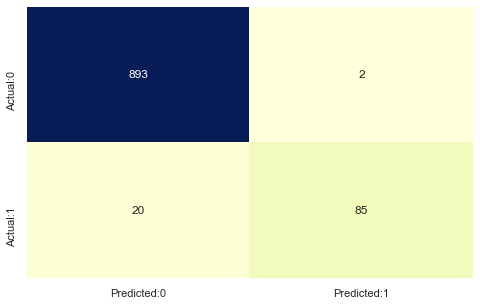

In [67]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_SVC)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

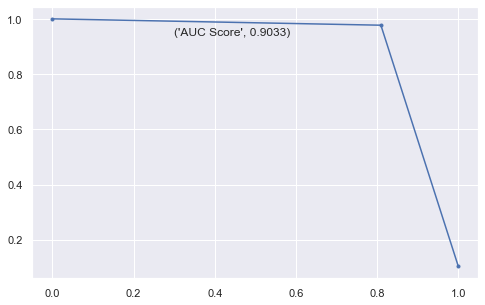

In [68]:
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_SVC)

# Calcaulte AUC Score
auc_precision_recall = auc(recall, precision)

# set the figure size
plt.figure(figsize = (8,5))

# plot the ROC curve
plt.plot(recall, precision, marker='.')

# add the AUC score
plt.text(x = 0.3, y = 0.94, s =('AUC Score', round(auc_precision_recall,4)))

plt.show()

In [69]:
# create the result table for all scores
SVM_metrices = pd.Series({'Model': "Support Vector Machine",
                     'PR-AUC Score' : auc_precision_recall,
                 'Precision Score': metrics.precision_score(y_test, y_pred_SVC),
                 'Recall Score': metrics.recall_score(y_test, y_pred_SVC),
                  'f1-score':metrics.f1_score(y_test, y_pred_SVC)})



# appending our result table
result_tabulation = result_tabulation.append(SVM_metrices , ignore_index = True)

# view the result table
result_tabulation

,Model,PR-AUC Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.782806,0.855422,0.676190,0.755319
1,Gaussian Naive Bayes,0.573324,0.496124,0.609524,0.547009
2,Support Vector Machine,0.903268,0.977011,0.809524,0.885417


<a id="random_forest"> </a>
## 5.4 Random Forest

We will perform Hyperparameter tunning to find optimal parameters of random forest classifier

[...goto toc](#toc)

In [70]:
# Fitting Random Forest Classification to the Training set
random_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
random_classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [71]:
# Predicting the Test set results
y_pred_random = random_classifier.predict(X_test)

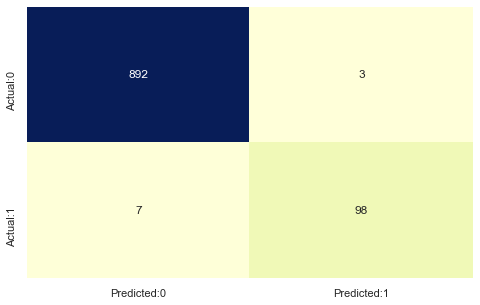

In [72]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_random)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

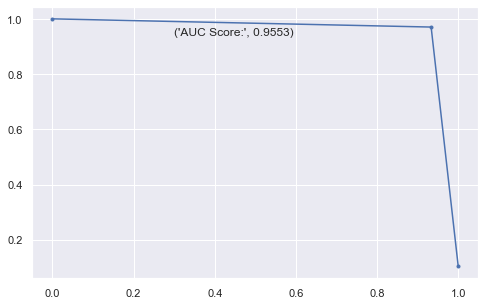

In [73]:
# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_random)

# Calcaulte AUC Score
auc_precision_recall = auc(recall, precision)

# set the figure size
plt.figure(figsize = (8,5))

# plot the ROC curve
plt.plot(recall, precision, marker = '.')

# add the AUC score
plt.text(x = 0.3, y = 0.94, s =('AUC Score:', round(auc_precision_recall,4)))

plt.show()

In [74]:
# create the result table for all scores
random_forest_metrics = pd.Series({'Model': "Random Forest",
                                   'PR-AUC Score' : auc_precision_recall,
                 'Precision Score': metrics.precision_score(y_test, y_pred_random),
                 'Recall Score': metrics.recall_score(y_test, y_pred_random),
                  'f1-score':metrics.f1_score(y_test, y_pred_random)})



# appending our result table
result_tabulation = result_tabulation.append(random_forest_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,PR-AUC Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.782806,0.855422,0.676190,0.755319
1,Gaussian Naive Bayes,0.573324,0.496124,0.609524,0.547009
2,Support Vector Machine,0.903268,0.977011,0.809524,0.885417
3,Random Forest,0.955315,0.970297,0.933333,0.951456


<a id="model_cmp"> </a>
## 6. Model Comparision

[...goto toc](#toc)

In [76]:
result_tabulation

,Model,PR-AUC Score,Precision Score,Recall Score,f1-score
0,Logistic Regression,0.782806,0.855422,0.676190,0.755319
1,Gaussian Naive Bayes,0.573324,0.496124,0.609524,0.547009
2,Support Vector Machine,0.903268,0.977011,0.809524,0.885417
3,Random Forest,0.955315,0.970297,0.933333,0.951456


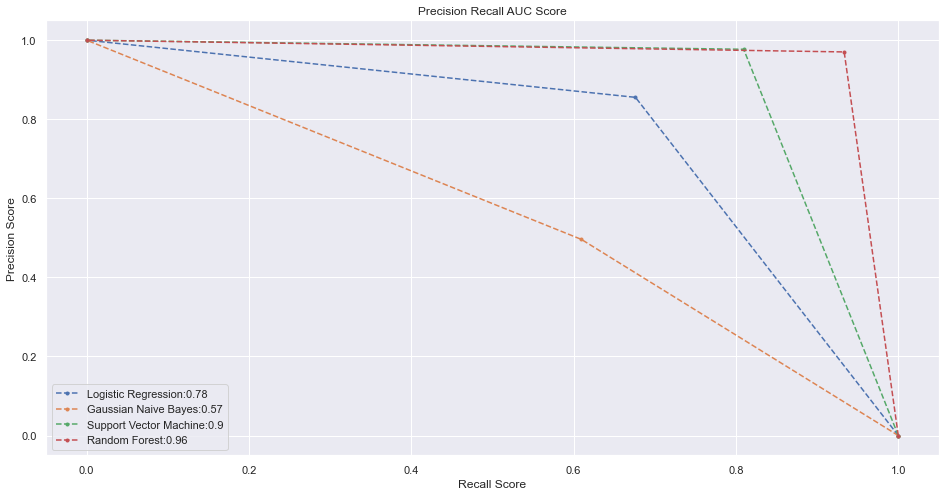

In [75]:
# Create a empty list to save legend
legend = []

# set the figure size
plt.figure(figsize = (16,8))

# Iterate over each row
for i in range(result_tabulation.shape[0]):
    # plot the ROC curve
    plt.plot([1.0, result_tabulation.iloc[i,3], 0.], [0., result_tabulation.iloc[i,2], 1.0], marker='.', linestyle='--')
    
    # append legend name to list
    legend.append(f'{result_tabulation.iloc[i,0]}:{round(result_tabulation.iloc[i,1], 2)}')

    
# Add title
plt.title("Precision Recall AUC Score")

# Add x-axis
plt.xlabel("Recall Score")

# Add y-axis
plt.ylabel("Precision Score")

# Add the legend
plt.legend(legend)

# Save figure
plt.savefig("model/models_roc_plot.png")

# Show the plot
plt.show()

From the above graph, it seems like **Random Forest Classifier** have the highest Precision Recall AUC Score of **0.96** and we will choose that as our final model.

In [77]:
# Best Model
best_model = random_classifier

In [78]:
# Create a dataframe to store importance of features
feature_importance = pd.DataFrame()
feature_importance['feature'] = x.columns.values.tolist()
feature_importance['Importance'] = best_model.feature_importances_

# Sort in decreasing order
feature_importance = feature_importance.sort_values(ascending = False, by = 'Importance').reset_index(drop=True)
feature_importance

,feature,Importance
0,Income,0.423407
1,CCAvg,0.182815
2,Education,0.158168
3,Family,0.098733
4,Age,0.046204
5,CDAccount,0.040623
6,Mortgage,0.029997
7,CreditCard,0.009090
8,Online,0.006348
9,SecuritiesAccount,0.004615


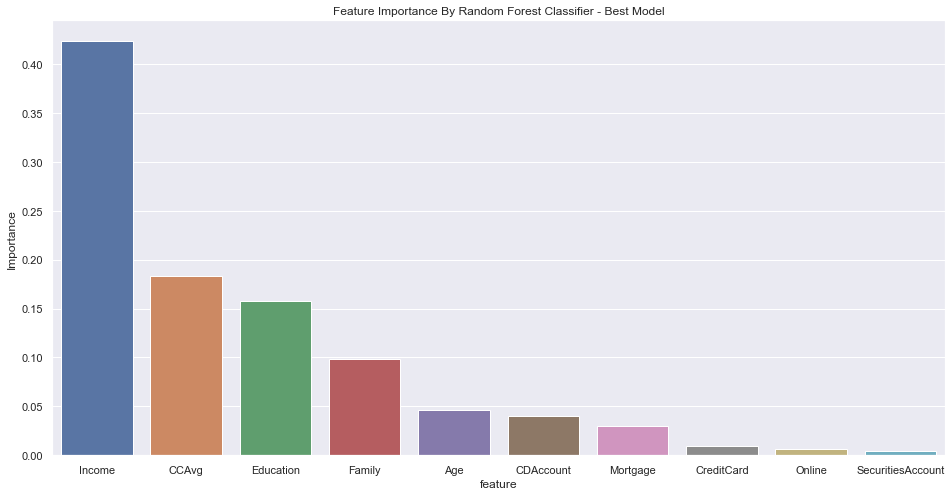

In [79]:
# Plot feature importance
fig, ax = plt.subplots(figsize = (16,8))

# Barplot
sns.barplot(x = 'feature' , y = 'Importance', data = feature_importance, ax = ax)

# Add title
ax.set_title("Feature Importance By Random Forest Classifier - Best Model")

# Save the plot
fig.savefig('model/Feature_importance.png')

# Show the plot
plt.show()

**Observations**

From the above plot it can see that target feature heavily depends on 

- Income
- CCAvg
- Education
- Family
- Age

### Save the model

In [80]:
# Save the model as a pickle in a file
joblib.dump(best_model, 'model/model.pkl')

['model/model.pkl']

<a id="conclusion"> </a>

[...goto toc](#toc)



<hr style="border:1.2px solid gray"> </hr>
<h3><center><u>Final Report</u></center></h3>
<hr style="border:1.2px solid gray"> </hr>


| Number of Instances | Number of Attributes | Numeric Features | Categorical Features | Target Feature | Missing Values |
| :-: | :-: | :-: | :-: | :-: | :-: |
| 5000  | 12 | 5 | 7  | PersonalLoan | Null |

<hr>

<h5><center>Data Types</center></h5>

| Sr.No. | Column | Data type |
| :-: | :- | :- |
| 1  | Age                                    | int64 |
| 2  | Experience                          | int64 | 
| 3  | Income                        | int64 | 
| 4  | Family                 | category | 
| 5  | CCAvg           | float64 |  
| 6  | Education                     | category | 
| 7  | Mortgage                     | int64 | 
| 8  | PersonalLoan                         | category | 
| 9  | SecuritiesAccount                 | category | 
| 10  | CDAccount                   | category | 
| 11 | Online                 | category | 
| 12 | CreditCard                | category | 

<hr>

<h4><center>Exploratory Data Analysis</center></h4>
<hr>

#### Numeric Features 

- **Age** feature is normally distributed with majority of customers falling between **30 years and 60 years** of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

- **Experience** is normally distributed with more customer having experience starting from **8 years**. Here the mean is equal to median. There are negative values in the Experience. 

    - This could be a data input error as in general it is not possible to measure negative years of experience. We will replace with the negeative records with median of entries having save age as age and experience are related to each other.

- Additionally, scatter plot of **Age** and **experience** indicated that they are positively correlated. As experience increase age also increases. 

- **Income** is positively skewed. Majority of the customers have income between **45K** and **55K**. We can confirm this by saying the mean is greater than the median

- **CCAvg** is also a positively skewed variable and average spending is between **0K to 10K** and majority spends less than **2.5K**

- Customers having a personal loan have a higher credit card average. Average credit card spending with a median of **3800** dollar indicates a **higher probability** of personal loan. Lower credit card spending with a median of **1400** dollars is less likely to take a loan. 

- **70%** of the individuals have a **mortgage** of less than **40K**. However the max value is **635K**.

- **Income** and **CCAvg** are moderately correlated
- **Age** and **Experience** are highly correlated

<hr>

#### Categorical Features

- Majority of customers who does not have loan have securities account

- Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

- Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well.

- The customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels.

- Additionally, Customers having personal loan have high mortgage

- Generally, as family size increase we can see that the education qualification decrease. Family with more number of members don't opte for higher studies.

- Generally, Larger familes prefer to have a certificate of deposit (CD) account with the bank. And majority of customers not having a Securities Account don't have CD Account

- Customers using a credit card don't opt for a certificate of deposit account with the bank also the one using a internet banking facilities have a certificate of deposit (CD) account with the bank.


<hr>
<h3><center><u>Conclusion</u></center></h3>
<hr>

The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data. 

In this study four classification algorithms (Logistic Regression, Naive Bayes, Support Vector Machine and Random Forest) were trained. Precision Recall AUC Score and F1-Score are used as evaluation metrics for our study. Out of all trained classifier **Random Forest** outperformed with **PR AUC Score** of **0.95** and **F1-score** of **0.95**.

According to random forest classifier, target feature heavily depends on

- **Income** - Annual income of the customer
- **CCAvg** - Avg. spending on credit cards per month 
- **Education** - Education Level of the customer {1 : Undergrad, 2 : Graduate, 3 : Advanced/Professional}
- **Family** - Family size of the customer
- **Age** - Customer's age in completed years

<h5><center>Trained Models</center></h5>
<hr>

| Model	| PR-AUC Score	| Precision Score	| Recall Score	| f1-score |
| :-: | :-: | :-: | :-: | :-: |
| Random Forest	| 0.955315	| 0.970297	| 0.933333	| 0.951456 |
| Logistic Regression	| 0.782806	| 0.855422	| 0.676190	| 0.755319 |
| Naive Bayes	| 0.573324	| 0.496124	|  0.609524	 |0.547009 |
| Support Vector Machine | 0.903268	| 0.977011 | 0.809524 | 0.885417 |

<hr>